# Project Sharks - Data Cleaning with Pandas

### Hipotesis a comprobar. ¿Son más agresivos los tiburones blancos en Estados Unidos?


### 1.  Importación de módulos y dataset

Importamos los módulos y las funciones necesarias para el data cleaning

In [1]:
import re
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import src.limpieza as lp
from pylab import *

In [2]:
#Importamos el csv con el dataset

data = pd.read_csv("Input/attacks.csv",encoding='cp1252')
data = pd.DataFrame(data)
data.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


### 2.  Análisis inicial previo a la hipótesis

Hacemos un análisis rápido para ver si tiene sentido la hipótesis inicial. Para ello:

1. Sacamos los  5 países con más ataques para comprobar si Estados Unidos está entre los países con más ataques
2. Vemos si "white shark" se encuentra entre los valores de la categoría especie.

El objetivo de este análisis previo es ver si la muestra de estudio es suficientemente grande para poder llevar a cabo un análisis más en detalle.

In [3]:
countries = data.Country.value_counts()
countries.head(5)

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
Name: Country, dtype: int64

In [4]:
data["Species "].str.contains('hite|HITE', regex=True).value_counts()


False    2797
True      667
Name: Species , dtype: int64

### 3.  Limpiamos los datos para testear nuestra hipótesis

Puntos a analizar:
1. ¿Cómo de grande es nuestro dataset?
2. Tipo de valores que contiene el dataset
3. Presencia de valores nulos en dataset
3. Renombrar y ordenar columnas

#### Tamaño dataset inicial


In [5]:
data.shape

(25723, 24)

#### Tipos de datos dataset

In [6]:
data.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

#### Valores nulos

Analizamos la presencia de valores nulos en nuestro dataset y hacemos una limpieza inicial

In [7]:
null_cols = data.isnull().sum()
null_cols

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Case Number - 66.0%
Date - 76.0%
Year - 76.0%
Type - 76.0%
Country - 76.0%
Area - 77.0%
Location - 78.0%
Activity - 78.0%
Name - 76.0%
Sex  - 78.0%
Age - 87.0%
Injury - 76.0%
Fatal (Y/N) - 78.0%
Time - 89.0%
Species  - 87.0%
Investigator or Source - 76.0%
pdf - 76.0%
href formula - 76.0%
href - 76.0%
Case Number.1 - 76.0%
Case Number.2 - 76.0%
original order - 75.0%
Unnamed: 22 - 100.0%
Unnamed: 23 - 100.0%


Al ver que hay muchos valores nulos en nuestro dataset vamos a eliminar las filas que únicamente tienen valores nulos y además, eliminaremos las categorías no relevantes.

#### Eliminar, renombrar y ordenar columnas

In [9]:
#Elimino las columnas con información no relevante para el estudio

drop_cols = ['Case Number','Type','Area','Year','Activity','Time','Location','Investigator or Source', 'Name','Sex ', 'Age','pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2','original order', 'Unnamed: 22', 'Unnamed: 23' ]
data = data.drop(drop_cols, axis =1)

#Elimino las filas donde TODOS los valores son nulos

data = data.dropna(how='all')
data.head(5)

,Date,Country,Injury,Fatal (Y/N),Species
0,25-Jun-2018,USA,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,18-Jun-2018,USA,Minor injury to left thigh,N,NaN
2,09-Jun-2018,USA,Injury to left lower leg from surfboard skeg,N,NaN
3,08-Jun-2018,AUSTRALIA,Minor injury to lower leg,N,2 m shark
4,04-Jun-2018,MEXICO,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


In [10]:
#Elimino filas con valores nulos en 'Date', 'Country', 'Fatal (Y/N)'

data = data.dropna(subset=['Date', 'Country', 'Fatal (Y/N)'])
data.head(5)

,Date,Country,Injury,Fatal (Y/N),Species
0,25-Jun-2018,USA,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,18-Jun-2018,USA,Minor injury to left thigh,N,NaN
2,09-Jun-2018,USA,Injury to left lower leg from surfboard skeg,N,NaN
3,08-Jun-2018,AUSTRALIA,Minor injury to lower leg,N,2 m shark
4,04-Jun-2018,MEXICO,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


In [11]:
#Cambio el nombre de las columnas para facilitar el análisis

data = data.rename(columns={'Fatal (Y/N)':'Fatal',
                           'Species ': 'Species'})

In [12]:
#Reorderno las columnas

column_oder =['Date','Country', 'Species', 'Injury', 'Fatal',]
data = data[column_oder]
data.head(3)

,Date,Country,Species,Injury,Fatal
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N


#### Tamaño del dataset después de la primera limpieza

In [13]:
data.shape

(5718, 5)

### 4.  Testeamos hipótesis

#### Limpiamos la columna "Species" 

In [14]:
#Aplicamos la función white_shark que filtra todas las filas que contienen la palabra "White"

data["White Shark (Y/N)"] = data["Species"].apply(lp.white_shark)

#Otra forma de hacer sería:
#data = data[data.apply(lambda row: row.astype(str).str.contains("hite").any(), axis=1)]

data.head(10)

,Date,Country,Species,Injury,Fatal,White Shark (Y/N)
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N,White Shark
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N,Other
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N,Other
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N,Other
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N,Other
5,03-Jun-2018,AUSTRALIA,NaN,"No injury, board bitten",N,Other
6,03-Jun-2018,BRAZIL,Tiger shark,FATAL,Y,Other
7,27-May-2018,USA,"Lemon shark, 3'",Minor injury to foot. PROVOKED INCIDENT,N,Other
8,26-May-2018,USA,"Bull shark, 6'",Lower left leg bitten,N,Other
9,26-May-2018,USA,NaN,Minor injury to foot,N,Other


In [15]:
#comprobamos que se ha ejecutado correctamente la función:

data["White Shark (Y/N)"].value_counts()

Other          5057
White Shark     661
Name: White Shark (Y/N), dtype: int64

#### Limpiamos la columna "Fatal" 

In [16]:
#Recategorizamos los tipos de ataques. Para ello, primero vemos todos los valores únicos que hay para limpiar los valores no válidos.

data.groupby('Fatal').agg({'Fatal':"count"}).sort_values

<bound method DataFrame.sort_values of          Fatal
Fatal         
 N           7
2017         1
M            1
N         4274
N            1
UNKNOWN     69
Y         1364
y            1>

In [17]:
#Aplicamos la función injury que recategoriza los valores de "Fatal"

data["Fatal (Y/N)"] = data["Fatal"].apply(lp.injury)
data.head(10)

,Date,Country,Species,Injury,Fatal,White Shark (Y/N),Fatal (Y/N)
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N,White Shark,N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N,Other,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N,Other,N
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N,Other,N
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N,Other,N
5,03-Jun-2018,AUSTRALIA,NaN,"No injury, board bitten",N,Other,N
6,03-Jun-2018,BRAZIL,Tiger shark,FATAL,Y,Other,Y
7,27-May-2018,USA,"Lemon shark, 3'",Minor injury to foot. PROVOKED INCIDENT,N,Other,N
8,26-May-2018,USA,"Bull shark, 6'",Lower left leg bitten,N,Other,N
9,26-May-2018,USA,NaN,Minor injury to foot,N,Other,N


In [18]:
#comprobamos que se ha ejecutado correctamente la función:

data["Fatal (Y/N)"].value_counts()

N    4353
Y    1365
Name: Fatal (Y/N), dtype: int64

In [19]:
data.head()

,Date,Country,Species,Injury,Fatal,White Shark (Y/N),Fatal (Y/N)
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N,White Shark,N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N,Other,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N,Other,N
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N,Other,N
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N,Other,N


In [20]:
#Nos quedamos con las columnas ya filtradas

drop_cols2 = ['Date','Injury', 'Species', 'Fatal']
data = data.drop(drop_cols2, axis =1)
data.shape

(5718, 3)

#### Filtramos por país y tipo de ataque

In [21]:
#Comprobamos que los nombres de los tres países elegidos están bien escritos y como valores únicos

data.groupby('Country').agg({'Country':"count"}).sort_values

<bound method DataFrame.sort_values of                    Country
Country                   
 PHILIPPINES             1
 TONGA                   3
ADMIRALTY ISLANDS        1
AFRICA                   1
ALGERIA                  1
...                    ...
VIETNAM                 15
WEST INDIES              2
WESTERN SAMOA            1
YEMEN                    2
YEMEN                    6

[202 rows x 1 columns]>

In [22]:
#filtramos por los países que nos interesa analizar y los ataques provocados por white sharks

filtered = data[(data['White Shark (Y/N)']=='White Shark') & 
                ((data['Country']=='USA') | 
                (data['Country']=='AUSTRALIA') | 
                (data['Country']=='SOUTH AFRICA'))
               ]
 
filtered.head(5)

,Country,White Shark (Y/N),Fatal (Y/N)
0,USA,White Shark,N
22,AUSTRALIA,White Shark,N
24,SOUTH AFRICA,White Shark,N
34,SOUTH AFRICA,White Shark,N
40,AUSTRALIA,White Shark,N
50,AUSTRALIA,White Shark,N
60,USA,White Shark,N
71,AUSTRALIA,White Shark,N
78,AUSTRALIA,White Shark,N
86,AUSTRALIA,White Shark,N


### 5.  Conclusiones y visualización de datos

In [23]:
#Nos quedamos con las columnas finales para las conclusiones

drop_cols3 = ['White Shark (Y/N)']
filtered = filtered.drop(drop_cols3, axis =1)

,Country,Fatal (Y/N)
0,USA,N
22,AUSTRALIA,N
24,SOUTH AFRICA,N
34,SOUTH AFRICA,N
40,AUSTRALIA,N


In [24]:
output_total = filtered.groupby(["Country"]).agg({"Country":"count"})
output_total.append(output_total.agg(['sum']))
output_total["%"] = [13, 14, 15]
output_total

,Country,%
Country,,
AUSTRALIA,154,13
SOUTH AFRICA,166,14
USA,205,15


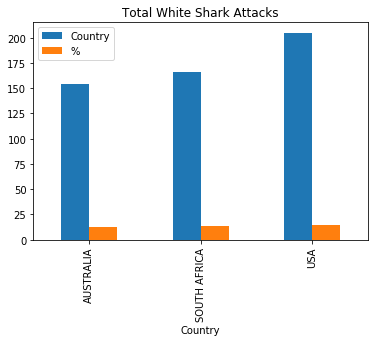

In [25]:
output_total.plot(kind='bar',title="Total White Shark Attacks")

Text(0.5, 1.02, 'Total White Shark Attacks')

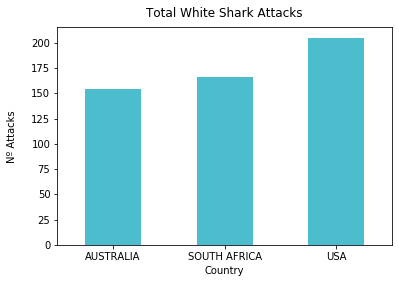

In [26]:
filtered.groupby(['Country']).size().plot(kind='bar',stacked=True, rot=0, 
                                          title="Total White Shark Attacks", color="#4bbdcc")

plt.ylabel("Nº Attacks", labelpad=14)
plt.title("Total White Shark Attacks", y=1.02)


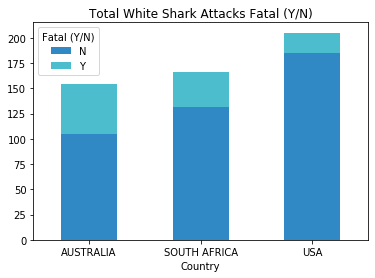

In [27]:
filtered.groupby(['Country','Fatal (Y/N)']).size().unstack().plot(kind='bar',
                                                                  stacked=True, rot=0, title="Total White Shark Attacks Fatal (Y/N)", color=["#3089c5","#4bbdcc"])


In [28]:
output_fatal = filtered.groupby(["Country", "Fatal (Y/N)"]).agg({"Country":"count"})
output_fatal.append(output_total.agg(['sum']))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,%,Country
"(AUSTRALIA, N)",NaN,105
"(AUSTRALIA, Y)",NaN,49
"(SOUTH AFRICA, N)",NaN,131
"(SOUTH AFRICA, Y)",NaN,35
"(USA, N)",NaN,185
"(USA, Y)",NaN,20
sum,42.0,525


In [29]:
filtered["Country"].value_counts().head()


USA             205
SOUTH AFRICA    166
AUSTRALIA       154
Name: Country, dtype: int64

In [30]:
filtered["Fatal (Y/N)"].value_counts().head()


N    421
Y    104
Name: Fatal (Y/N), dtype: int64

In [31]:
output = filtered.groupby(["Country"]).agg({"Country":"count"})
output


,Country
Country,
AUSTRALIA,154
SOUTH AFRICA,166
USA,205


In [32]:
output = filtered.groupby(["Country", "Fatal (Y/N)"]).agg({"Country":"count"})
output.T


Country     AUSTRALIA     SOUTH AFRICA      USA    
Fatal (Y/N)         N   Y            N   Y    N   Y
Country           105  49          131  35  185  20

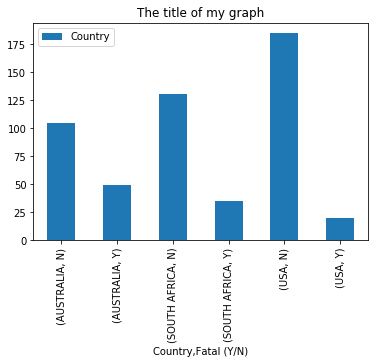

In [33]:
output.plot(kind='bar',stacked=True,title="The title of my graph")


### 6.  Guardamos el dataset limpio

In [34]:
#Guardo el nuevo dataset con los datos limpios para su próximo analisis.
output.to_csv('sharkattack_output.csv')